In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
### Set coordinates to lat_lngs.
coordinates = lat_lngs
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | bengkulu
Processing Record 2 of Set 13 | clyde river
Processing Record 3 of Set 13 | albany
Processing Record 4 of Set 13 | ponta do sol
Processing Record 5 of Set 13 | busselton
Processing Record 6 of Set 13 | hokitika
Processing Record 7 of Set 13 | hobart
Processing Record 8 of Set 13 | saint-louis
Processing Record 9 of Set 13 | hilo
Processing Record 10 of Set 13 | esperance
Processing Record 11 of Set 13 | auki
Processing Record 12 of Set 13 | soyo
Processing Record 13 of Set 13 | jamestown
Processing Record 14 of Set 13 | severo-kurilsk
Processing Record 15 of Set 13 | georgetown
Processing Record 16 of Set 13 | carnarvon
Processing Record 17 of Set 13 | ushuaia
Processing Record 18 of Set 13 | port hardy
Processing Record 19 of Set 13 | port hawkesbury
Processing Record 20 of Set 13 | mar del plata
Processing Record 21 of Set 13 | longyearbyen
Processing Record 22 of Set 13 | bambous vir

Processing Record 33 of Set 16 | ust-kamchatsk
City not found. Skipping...
Processing Record 34 of Set 16 | cape town
Processing Record 35 of Set 16 | zachagansk
City not found. Skipping...
Processing Record 36 of Set 16 | garden city
Processing Record 37 of Set 16 | cherskiy
Processing Record 38 of Set 16 | saint-georges
Processing Record 39 of Set 16 | quixada
Processing Record 40 of Set 16 | sataua
City not found. Skipping...
Processing Record 41 of Set 16 | taoudenni
Processing Record 42 of Set 16 | isangel
Processing Record 43 of Set 16 | gat
Processing Record 44 of Set 16 | lata
Processing Record 45 of Set 16 | saleaula
City not found. Skipping...
Processing Record 46 of Set 16 | belushya guba
City not found. Skipping...
Processing Record 47 of Set 16 | sinkat
City not found. Skipping...
Processing Record 48 of Set 16 | bababe
City not found. Skipping...
Processing Record 49 of Set 16 | marawi
Processing Record 50 of Set 16 | port elizabeth
Processing Record 1 of Set 17 | sao jos

Processing Record 14 of Set 20 | shelburne
Processing Record 15 of Set 20 | taltal
Processing Record 16 of Set 20 | tamale
Processing Record 17 of Set 20 | kungurtug
Processing Record 18 of Set 20 | sisimiut
Processing Record 19 of Set 20 | magadan
Processing Record 20 of Set 20 | talcahuano
Processing Record 21 of Set 20 | mount gambier
Processing Record 22 of Set 20 | puerto escondido
Processing Record 23 of Set 20 | belogradcik
City not found. Skipping...
Processing Record 24 of Set 20 | palabuhanratu
City not found. Skipping...
Processing Record 25 of Set 20 | shahrud
Processing Record 26 of Set 20 | mokrous
Processing Record 27 of Set 20 | atar
Processing Record 28 of Set 20 | pangkalanbuun
Processing Record 29 of Set 20 | ixtapa
Processing Record 30 of Set 20 | aras
Processing Record 31 of Set 20 | najran
Processing Record 32 of Set 20 | swanton
Processing Record 33 of Set 20 | provideniya
Processing Record 34 of Set 20 | mandalgovi
Processing Record 35 of Set 20 | aksu
Processin

Processing Record 49 of Set 23 | peleduy
Processing Record 50 of Set 23 | chichli
Processing Record 1 of Set 24 | cochrane
Processing Record 2 of Set 24 | porangatu
Processing Record 3 of Set 24 | coahuayana
Processing Record 4 of Set 24 | tautira
Processing Record 5 of Set 24 | rincon
Processing Record 6 of Set 24 | vardo
Processing Record 7 of Set 24 | beloha
Processing Record 8 of Set 24 | bardiyah
Processing Record 9 of Set 24 | ngukurr
City not found. Skipping...
Processing Record 10 of Set 24 | paciran
Processing Record 11 of Set 24 | itarema
Processing Record 12 of Set 24 | zonguldak
Processing Record 13 of Set 24 | teknaf
Processing Record 14 of Set 24 | baghdad
Processing Record 15 of Set 24 | omsukchan
Processing Record 16 of Set 24 | acarau
Processing Record 17 of Set 24 | fayaoue
Processing Record 18 of Set 24 | santa barbara
Processing Record 19 of Set 24 | naryan-mar
Processing Record 20 of Set 24 | altay
Processing Record 21 of Set 24 | sun valley
Processing Record 22 of

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bengkulu,-3.8004,102.2655,74.12,92,100,5.32,ID,2022-10-26 20:20:19
1,Clyde River,70.4692,-68.5914,16.03,86,100,17.27,CA,2022-10-26 20:20:19
2,Albany,42.6001,-73.9662,74.17,71,5,8.75,US,2022-10-26 20:20:01
3,Ponta Do Sol,32.6667,-17.1000,74.01,73,65,5.41,PT,2022-10-26 20:19:43
4,Busselton,-33.6500,115.3333,46.09,75,22,8.88,AU,2022-10-26 20:20:20
5,Hokitika,-42.7167,170.9667,52.93,87,100,4.99,NZ,2022-10-26 20:20:21
6,Hobart,-42.8794,147.3294,55.26,98,75,8.05,AU,2022-10-26 20:20:21
7,Saint-Louis,16.3333,-15.0000,94.23,11,51,10.80,SN,2022-10-26 20:20:22
8,Hilo,19.7297,-155.0900,84.11,71,40,8.05,US,2022-10-26 20:20:22
9,Esperance,-33.8667,121.9000,56.79,60,98,9.98,AU,2022-10-26 20:20:23


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
updated_weather_df = city_data_df[new_column_order]
updated_weather_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bengkulu,ID,2022-10-26 20:20:19,-3.8004,102.2655,74.12,92,100,5.32
1,Clyde River,CA,2022-10-26 20:20:19,70.4692,-68.5914,16.03,86,100,17.27
2,Albany,US,2022-10-26 20:20:01,42.6001,-73.9662,74.17,71,5,8.75
3,Ponta Do Sol,PT,2022-10-26 20:19:43,32.6667,-17.1000,74.01,73,65,5.41
4,Busselton,AU,2022-10-26 20:20:20,-33.6500,115.3333,46.09,75,22,8.88
...,...,...,...,...,...,...,...,...,...
558,Kudat,MY,2022-10-26 20:36:08,6.8837,116.8477,78.73,94,20,1.14
559,Petropavlovsk-Kamchatskiy,RU,2022-10-26 20:36:09,53.0452,158.6483,32.59,80,75,2.24
560,Kyaka,TZ,2022-10-26 20:36:09,-1.2522,31.4203,69.62,84,9,2.93
561,Kerouane,GN,2022-10-26 20:36:10,9.2667,-9.0167,75.09,74,87,2.21


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

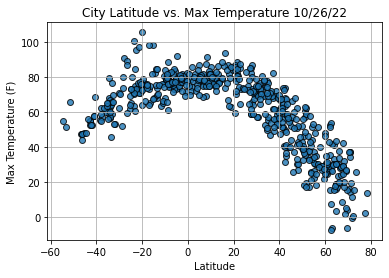

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

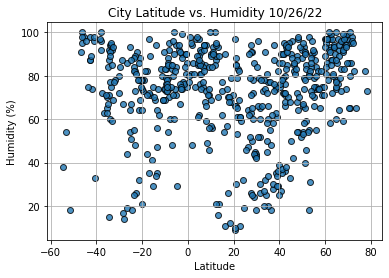

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

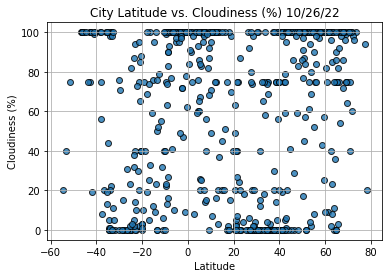

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

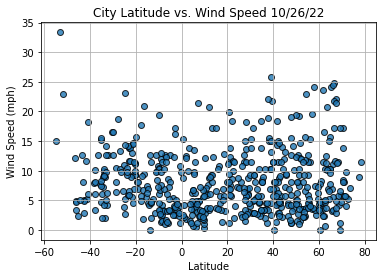

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

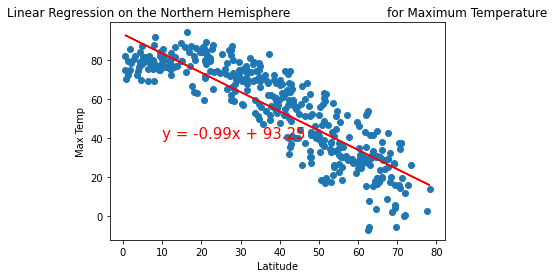

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

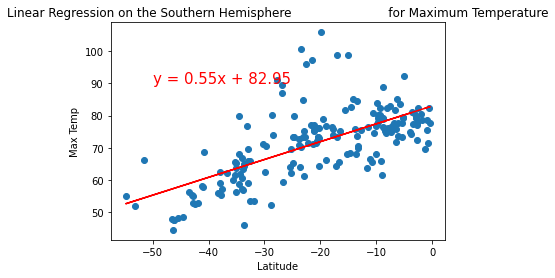

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

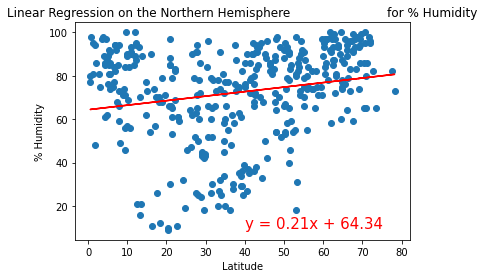

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

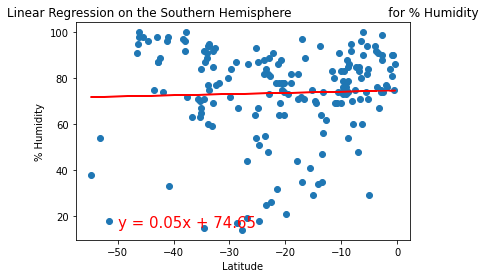

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

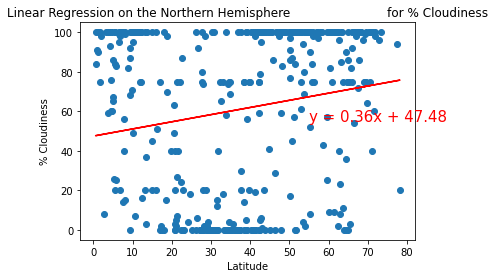

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(55,55))

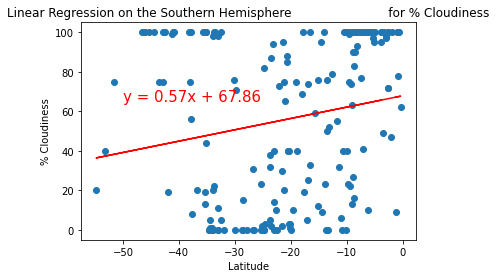

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,65))

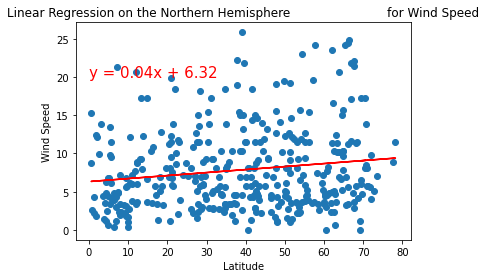

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,20))

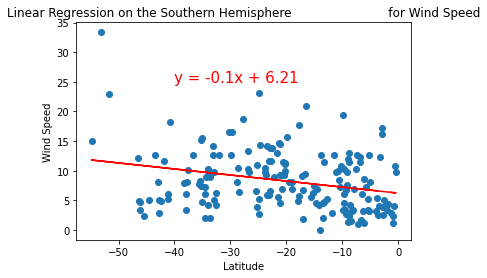

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-40,25))